<a href="https://colab.research.google.com/github/Sharminrahi/Deep-Learning/blob/main/Assignment_1_Q1(Start_Up_Predict_profit_using_Multi_LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Sharmin Akhter
## ID: 201891112
## Date: 26-01-2023

# Question 1
Linear regression on the start-up dataset. Download the start-up dataset from
Brightspace and analyse it in Python. The goal is to do multi-linear regression to predict the pro t of a start-up based on the features in the dataset.

Your investigation should include answering the following question:

(a) How many samples does this dataset have?

(b) Are there any missing values in the dataset?

(c) Is linear regression a suitable method for this dataset at all?
Note that there are some categorical features in the dataset. These would need to be converted to numerical data  set.

For the linear regression, use 80% of the data for training and 20% for testing. Visualize the predictions and assess whether the model works well on the test data, e.g., by computing the R2-score.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from matplotlib.pyplot import figure
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
#Mount drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [ ]:
from pickle import TRUE
file_path = '/content/drive/MyDrive/StartUpProfits.csv'
# Reading dataset 
df = pd.read_csv(file_path)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Shape of Data

In [ ]:
df.shape

(50, 5)

# Type of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Question 1(a)
How many samples does this dataset have?

In [ ]:
df.shape[0]

50

# Question 1(b)
Are there any missing values in the dataset?

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
print(df.isnull().sum())
print('Count of NAN ' + str(df.isnull().sum().sum()))
print(df)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
Count of NAN 0
    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.

In [ ]:
catagorical_idx = df.select_dtypes(include=['object', 'bool']).dtypes
print(catagorical_idx.index)

Index(['State'], dtype='object')


# Question 1(c)
Is linear regression a suitable method for this dataset at all?

The shape of the dataset being (50, 5) does not provide enough information to determine if linear regression is a suitable method for this dataset. However, the sample size of 50 observations is relatively small, which could be a concern if the data is complex or non-linear.

# Check the correlation of each feature

In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Correlation Matrix

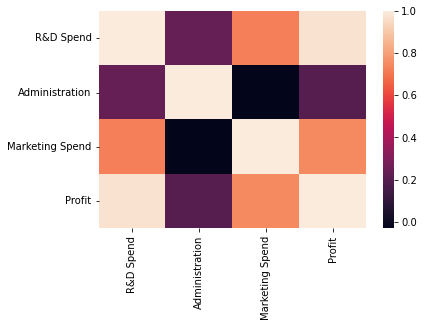

In [ ]:
a = df.corr()
x = sns.heatmap(a,xticklabels = a.columns.values,yticklabels = a.columns.values)

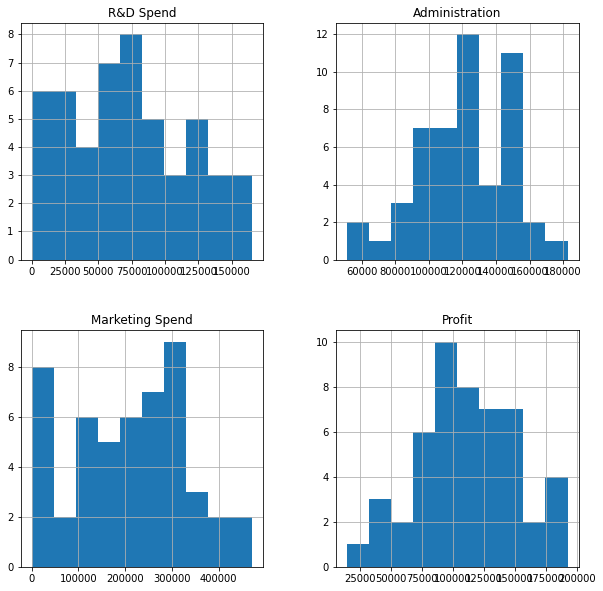

In [ ]:
df.hist(figsize=(10,10));

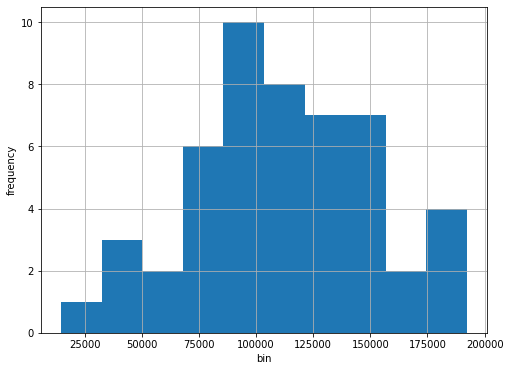

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.hist(df['Profit'], bins = 10)
plt.xlabel('bin')
plt.ylabel('frequency')
plt.grid()
plt.show()

In [ ]:
#Categorical data
catagorical_idx = df.select_dtypes(include=['object', 'bool']).dtypes
print(catagorical_idx.index)

Index(['State'], dtype='object')


In [ ]:
df.State

0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object

In [ ]:
def label1(row):
    if row['State'] == 'New York':
        return 0
    elif row['State'] == 'California':
        return 1
    else:
        return 2

df['State'] = df.apply(lambda row: label1(row), axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


#Model Selection
Split Data

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
# Get the predictor for Linear Regression Model
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
Y = df[['Profit']]

In [ ]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,0
1,162597.70,151377.59,443898.53,1
2,153441.51,101145.55,407934.54,2
3,144372.41,118671.85,383199.62,0
4,142107.34,91391.77,366168.42,2
5,131876.90,99814.71,362861.36,0
6,134615.46,147198.87,127716.82,1
7,130298.13,145530.06,323876.68,2
8,120542.52,148718.95,311613.29,0
9,123334.88,108679.17,304981.62,1


#Visualize the predictions and assess whether the model works well on the test data, e.g., by computing the R2-score.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.metrics import r2_score

# create and fit a linear regression model
reg = LinearRegression()
reg.fit(X_train, Y_train)

# make predictions using the model
y_pred = reg.predict(X_test)

# calculate the R-squared score
r2 = r2_score(Y_test, y_pred)

# print the R-squared score
print('R-squared score: ', r2*100)

R-squared score:  89.90092409390613


In [ ]:
print(f'Training Acc {round(reg.score(X_train, Y_train) * 100, 2)}%')

Training Acc 95.37%


# Question 1(c)
#Part b
Visualize the predictions and assess whether the model works well on the test data, e.g., by computing the R2-score.

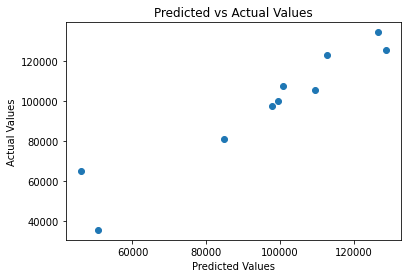

In [ ]:
# create a scatter plot of the predicted vs actual values
plt.scatter(y_pred, Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Values')
plt.show()

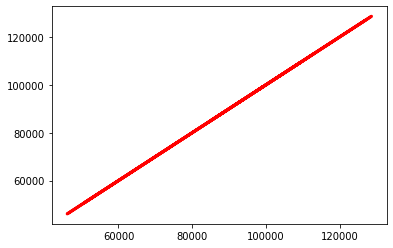

In [ ]:
# create the line of best fit
plt.plot(y_pred,reg.predict(X_test), color='red', linewidth=3)